In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_70861_I')

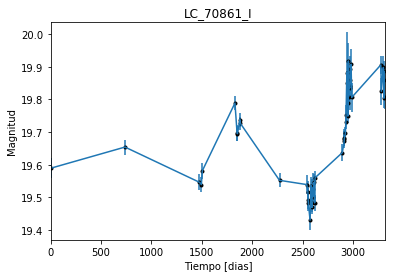

In [2]:
data = np.genfromtxt('LC_70861_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_70861_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

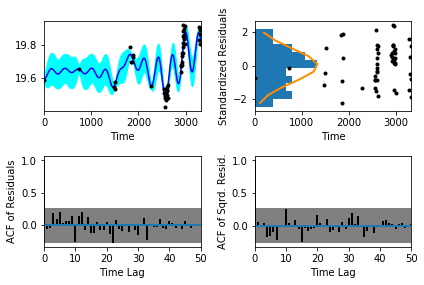

In [5]:
sample.assess_fit()

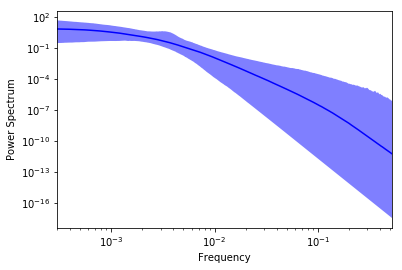

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_70861_I')

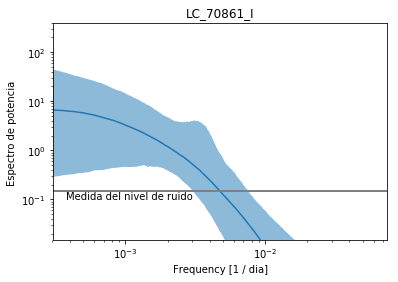

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_70861_I')

Text(0.5,1,'Prediccion , valor esperado 70861_I')

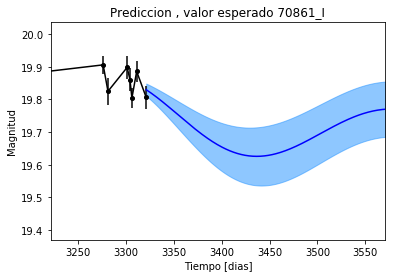

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 70861_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_70861_I')

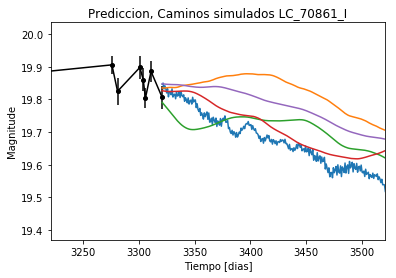

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_70861_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_70861_I')

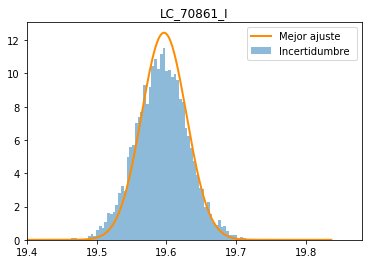

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_70861_I')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_I')

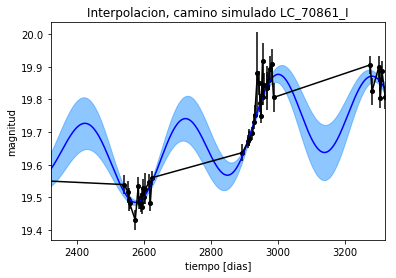

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_I')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_I')

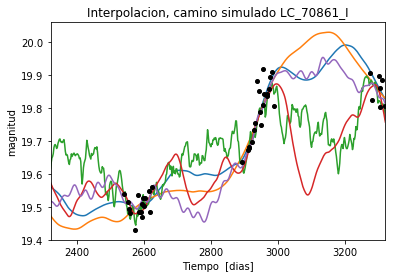

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 658.387609321
Median: 0.0073094627322
Standard deviation: 0.190994307206
68% credibility interval: [ 0.00078923  0.15030498]
95% credibility interval: [  3.42962370e-04   7.69005056e-01]
99% credibility interval: [  3.05423386e-04   9.71501761e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 630.259043723
Median: 0.00174109479888
Standard deviation: 0.0712728619581
68% credibility interval: [ 0.0005025   0.01541503]
95% credibility interval: [ 0.00032202  0.21324813]
99% credibility interval: [  3.03742754e-04   5.02553243e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 271.925721155
Median: 0.0214216024746
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1296.69526256
Median: 110.270267168
Standard deviation: 1.66056794975
68% credibility interval: [ 108.44515409  111.49398806]
95% credibility interval: [ 105.79417253  112.24390659]
99% credibility interval: [ 103.8773036   112.82575625]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 342.250188279
Median: 0.601846416747
Standard deviation: 2.18206750712
68% credibility interval: [ 0.06228544  3.8579914 ]
95% credibility interval: [ 0.01802228  7.35439879]
99% credibility interval: [  0.01128683  10.39446716]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 286.620379987
Median: 0.280059730029
Standard deviation: 8.57779463758
68% credibility interval: [ 0.00852403  5.79550331]
95% credibility interval: [  9.13119621e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 22317.7835739
Median: 3.28711899024e-30
Standard deviation: 9.51940995316e+51
68% credibility interval: [  2.22361915e-87   7.72998248e+00]
95% credibility interval: [  5.68480776e-132   4.91888797e+043]
99% credibility interval: [  2.06339902e-142   1.76959739e+049]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2874.77338801
Median: 19.662667633
Standard deviation: 0.0670820105215
68% credibility interval: [ 19.60639141  19.71707585]
95% credibility interval: [ 19.52743851  19.79793655]
99% credibility interval: [ 19.42470828  19.87404383]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 309.949050247
Median: 0.00359767390714
Standard deviation: 0.228559773837
68% credibility interval: [ 0.          0.26712715]
95% credibility interval: [ 0.        0.867598]
99% credibility interval: [ 0.          1.00555633]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 309.949050247
Median: 0.00359767390714
Standard deviation: 0.228559773837
68% credibility interval: [ 0.          0.26712715]
95% credibility interval: [ 0.        0.867598]
99% credibility interval: [ 0.          1.00555633]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 415.009181093
Median: 0.0
Standard deviation: 0.000866316810441
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1296.69526256
Median: 110.270267168
Standard deviation: 1.66056794975
68% credibility interval: [ 108.44515409  111.49398806]
95% credibility interval: [ 105.79417253  112.24390659]
99% credibility interval: [ 103.8773036   112.82575625]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1455.08681503
Median: 0.0209599638555
Standard deviation: 0.0262889513347
68% credibility interval: [ 0.01245571  0.03877647]
95% credibility interval: [ 0.00815589  0.08169849]
99% credibility interval: [ 0.00632904  0.14840415]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1695.58301236
Median: 1.10173060477
Standard deviation: 0.179245983884
68% credibility interval: [ 0.9475381   1.29296933]
95% credibility interval: [ 0.81353276  1.52501927]
99% credibility interval: [ 0.73809603  1.68536883]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 566.203431739
Median: 0.000116581614985
Standard deviation: 0.119762990239
68% credibility interval: [  8.47555353e-08   4.46106072e-03]
95% credibility interval: [  1.01713209e-48   9.16821349e-02]
99% credibility interval: [  1.20933485e-54   6.93658873e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 658.387609321
Median: (-0.0459267088423-0.363428204889j)
Standard deviation: 1.87148654036
68% credibility interval: [-0.94439406+0.j         -0.00495891-0.73858171j]
95% credibility interval: [ -4.83180127e+00+0.j          -2.15489613e-03-0.02235462j]
99% credibility interval: [ -6.10412559e+00+0.j          -1.91903173e-03-2.46100606j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 630.259043723
Median: (-0.0109396212587+0.0213844853889j)
Standard deviation: 1.50428682684
68% credibility interval: [-0.09685549+0.64685896j -0.00315731+0.02004819j]
95% credibility interval: [-1.3398775+6.2848864j -0.0020233+0.j       ]
99% credibility interval: [ -3.15763515e+00+3.41965802j  -1.90847201e-03+0.j        ]
Posterior summa